In [1]:
import numpy as np
import matplotlib.pyplot as plt
from Dipper_Project_Functions import read_lightcurve_csv
from Dipper_Project_Functions import read_lightcurve_dat
from Dipper_Project_Functions import plotparams

In [2]:
with open('fullshort_APASS_J085815.7-430955.db.txt', 'r') as file:
	table1 = []
	table2 = []
	for line in file:
		if line[0]!='2':
			continue
		row = line.strip().split()
		if row[2]=='0.00':
			table2.append([row[0]]+[row[4]])
		#else: 
		elif float(row[3])<=20: #or the limit you choose
			table1.append([row[0]]+[row[2]]+[row[3]])

table1=np.array(table1,dtype=float)
table2=np.array(table2,dtype=float)

#np.savetxt('dasch_data.txt',table1,header='Date (JD), mag, err')
#np.savetxt('dasch_lim.txt',table2,header='Date (JD), limiting magnitude')

In [3]:
colors = ["#6b8bcd", "#b3b540", "#8f62ca", "#5eb550", "#c75d9c", "#4bb092", "#c5562f", "#6c7f39", 
              "#ce5761", "#c68c45", '#b5b246', '#d77fcc', '#7362cf', '#ce443f', '#3fc1bf', '#cda735',
              '#a1b055']

In [4]:
dfv, dfg = read_lightcurve_csv(352187470767, '~/Desktop/Research/Updated_LC_Data')
dfg = dfg.loc[dfg.Mag < 20].reset_index(drop=True)
dfv = dfv.loc[dfv.Mag < 20].reset_index(drop=True)

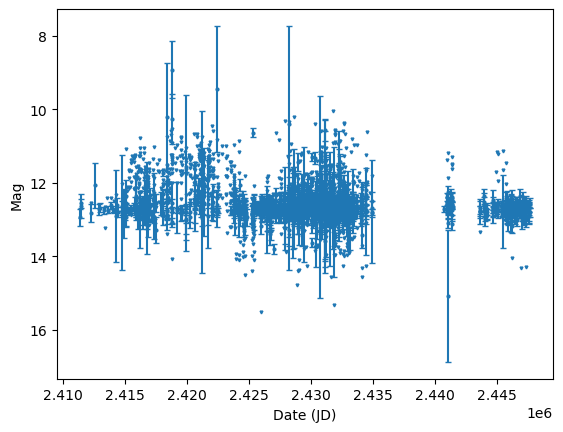

In [5]:
plt.errorbar(table1[:,0],table1[:,1],yerr=table1[:,2],mec=None,capsize=2.0,marker='o',color='C0',ms=2,ls='')
plt.plot(table2[:,0],table2[:,1],marker='v',color='C0',ms=2,ls='')
plt.xlabel('Date (JD)')
plt.ylabel('Mag')
plt.gca().invert_yaxis()
plt.show()

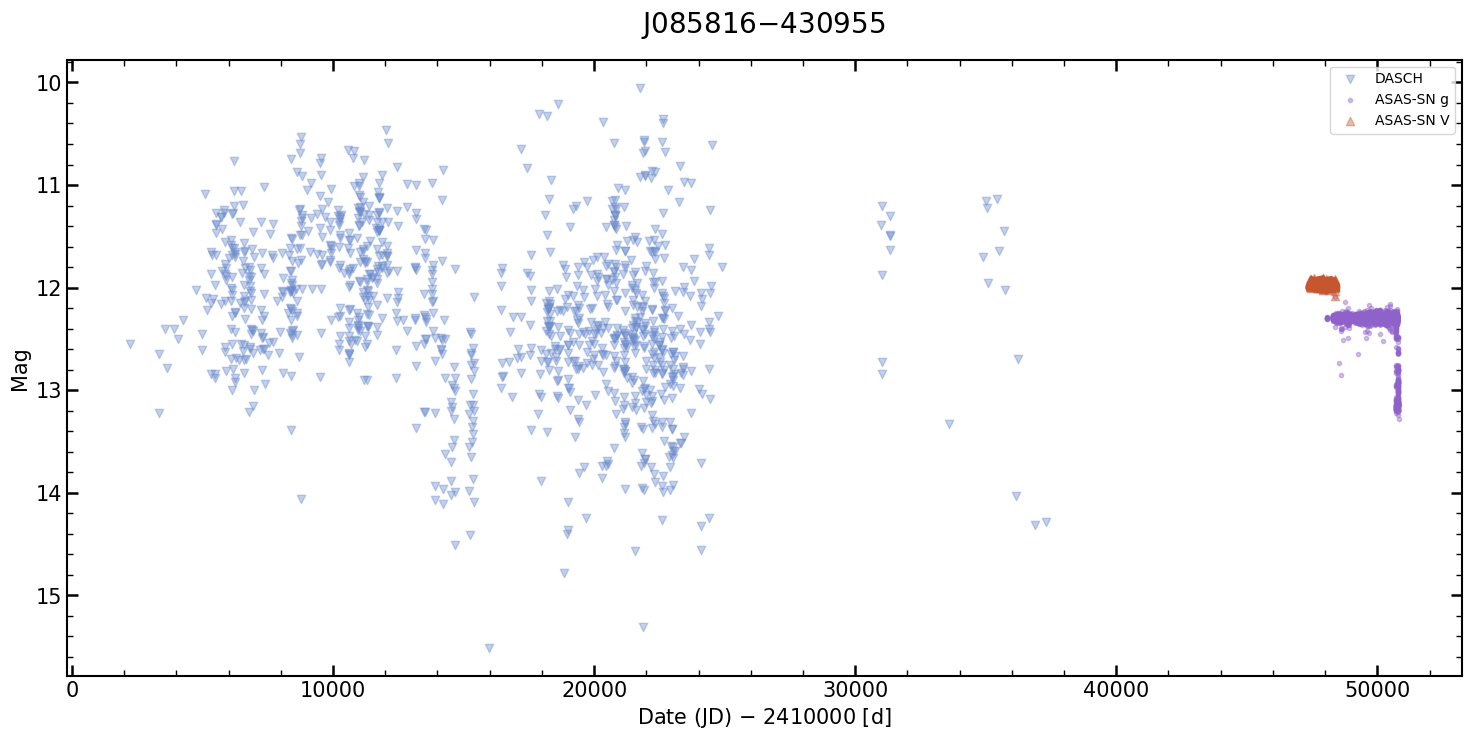

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(18, 8))
ax = plotparams(ax)

ax.scatter(table2[:,0]-2410000, table2[:,1], marker='v', color=colors[0], alpha=0.4, label='DASCH')
ax.scatter(dfg.JD-2410000, dfg.Mag, marker='.', color=colors[2], alpha=0.4, label='ASAS-SN g')
ax.scatter(dfv.JD-2410000, dfv.Mag, marker='^', color=colors[6], alpha=0.4, label='ASAS-SN V')

ax.set_xlabel('Date (JD) $-$ 2410000 [d]', fontsize=15)
ax.set_ylabel('Mag', fontsize=15)
ax.set_title('J085816$-$430955 ', y=1.03, fontsize=20)
ax.invert_yaxis()
ax.legend()